## Import all required libraries


In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Flatten
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.callbacks import EarlyStopping



## Load Train and Test data

In [38]:
# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv("/kaggle/input/Kannada-MNIST/train.csv")
test = pd.read_csv("/kaggle/input/Kannada-MNIST/test.csv")

# Create numpy input data
train_full_X = (train.iloc[:,1:].values).astype('float32') # all pixel values
train_full_y = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
test_X = (test.iloc[:,1:].values).astype('float32')

# Reshape
train_full_X = train_full_X.reshape(train_full_X.shape[0], 28, 28,1)
test_X = test_X.reshape(test_X.shape[0], 28, 28,1)

## Designing Fully Connected Neural Network Architecture

In [39]:
model = Sequential([  
    Flatten(input_shape=(28,28)),
    #Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
    ])


Compile network

In [40]:
optimizer = keras.optimizers.Adam(learning_rate=1e-6)
model.compile(optimizer=optimizer,
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

Split the data

In [41]:
train_X, val_X, train_y, val_y = train_test_split(train_full_X, train_full_y, test_size=0.10, random_state=42)


Run the model

In [42]:
early_stopping = EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],verbose=1)

Epoch 1/200
106/106 [==============================] - 1s 5ms/step - loss: 7.4518 - accuracy: 0.8194 - val_loss: 2.4457 - val_accuracy: 0.8973
Epoch 2/200
106/106 [==============================] - 0s 4ms/step - loss: 1.8911 - accuracy: 0.9168 - val_loss: 1.6800 - val_accuracy: 0.9207
Epoch 3/200
106/106 [==============================] - 0s 4ms/step - loss: 1.3030 - accuracy: 0.9340 - val_loss: 1.3562 - val_accuracy: 0.9303
Epoch 4/200
106/106 [==============================] - 0s 4ms/step - loss: 0.9976 - accuracy: 0.9425 - val_loss: 1.1909 - val_accuracy: 0.9375
Epoch 5/200
106/106 [==============================] - 0s 4ms/step - loss: 0.8122 - accuracy: 0.9492 - val_loss: 1.0748 - val_accuracy: 0.9410
Epoch 6/200
106/106 [==============================] - 0s 4ms/step - loss: 0.6816 - accuracy: 0.9534 - val_loss: 1.0117 - val_accuracy: 0.9405
Epoch 7/200
106/106 [==============================] - 0s 4ms/step - loss: 0.5883 - accuracy: 0.9575 - val_loss: 0.9598 - val_accuracy: 0.9422

<AxesSubplot:title={'center':'Accuracy'}>

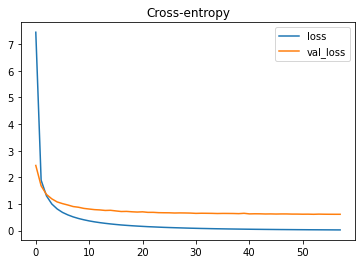

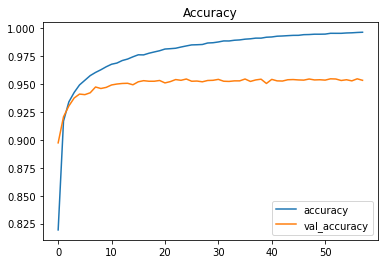

In [43]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [44]:
model.evaluate(val_X, val_y)

188/188 [==============================] - 0s 850us/step - loss: 0.6106 - accuracy: 0.9545


[0.6105530261993408, 0.9545000195503235]